In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

%matplotlib inline

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
root_path = 'drive/My Drive/Machine Learning/Logistic_Regression/'

In [21]:
df_X = pd.read_csv(root_path+'logistic_x.txt', sep='\s+', header=None, engine='python')
print(df_X.shape)

(99, 2)


In [22]:
print(df_X[0:5])

          0         1
0  1.343250 -1.331148
1  1.820553 -0.634668
2  0.986321 -1.888576
3  1.944373 -1.635452
4  0.976734 -1.353315


In [25]:
ys = pd.read_csv(root_path + 'logistic_y.txt', sep='\s+', header=None, engine='python')
ys = ys.astype(int)
print(ys.shape)

(99, 1)


In [26]:
print(ys[:5])

   0
0 -1
1 -1
2 -1
3 -1
4 -1


In [29]:
# Let's append the labels to the data
df_X['label'] = ys[0].values
print(df_X[:5])

          0         1  label
0  1.343250 -1.331148     -1
1  1.820553 -0.634668     -1
2  0.986321 -1.888576     -1
3  1.944373 -1.635452     -1
4  0.976734 -1.353315     -1


In [32]:
data_1 = df_X.query('label == -1')
data_2 = df_X.query('label == 1')
print(type(data_1), data_1.shape, data_2.shape)
print(data_1[:5])
print(data_2[:5])

<class 'pandas.core.frame.DataFrame'> (50, 3) (49, 3)
          0         1  label
0  1.343250 -1.331148     -1
1  1.820553 -0.634668     -1
2  0.986321 -1.888576     -1
3  1.944373 -1.635452     -1
4  0.976734 -1.353315     -1
           0         1  label
50  5.170900  1.210367      1
51  4.879519  1.608185      1
52  4.664987  1.069553      1
53  4.493432  1.235159      1
54  4.151297  0.867213      1


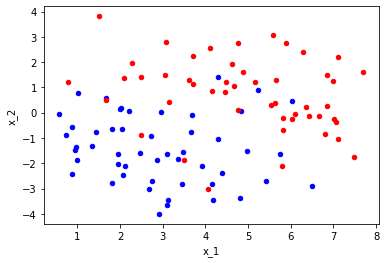

In [35]:
ax = plt.axes()
data_1.plot.scatter(x = 0, y = 1, ax = ax, color='blue')
data_2.plot.scatter(x = 0, y = 1, ax=ax, color='red')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

In [36]:
Xs = df_X[[0, 1]].values
print(Xs.shape)
print(Xs[:5])

(99, 2)
[[ 1.3432504  -1.3311479 ]
 [ 1.8205529  -0.6346681 ]
 [ 0.98632067 -1.8885762 ]
 [ 1.9443734  -1.635452  ]
 [ 0.97673352 -1.3533151 ]]


In [42]:
Xs = np.hstack([np.ones((Xs.shape[0], 1)), Xs])

In [43]:
print(Xs.shape)
print(Xs[:5])

(99, 3)
[[ 1.          1.3432504  -1.3311479 ]
 [ 1.          1.8205529  -0.6346681 ]
 [ 1.          0.98632067 -1.8885762 ]
 [ 1.          1.9443734  -1.635452  ]
 [ 1.          0.97673352 -1.3533151 ]]


In [45]:
ys = df_X['label'].values
print(ys.shape)
print(ys[:5])

(99,)
[-1 -1 -1 -1 -1]


In [57]:
thetas = []
theta = np.zeros(Xs.shape[1])
tot = 1e9
eps = 1e-6
itr = 0

while(tot > eps):

  zs = ys * np.matmul(Xs, theta)
  gzs = 1/(1 + np.exp(-zs))
  temp = (gzs - 1) * ys * Xs.T
  nablaJ = np.mean(temp, axis=1)
  hessian = np.zeros((Xs.shape[1], Xs.shape[1]))
  for i in range(hessian.shape[0]):
    for j in range(hessian.shape[0]):
      if(i <= j):
        hessian[i][j] = np.mean(gzs * (1 - gzs) * Xs[:, i] * Xs[:, j])
        if(i != j):
          hessian[j][i] = hessian[i][j]

  delta = np.linalg.inv(hessian).dot(nablaJ)
  old_theta = theta.copy()
  theta -= delta
  thetas.append(theta)

  tot = np.sum(np.abs(theta - old_theta))
  itr = itr + 1

print('converged after {0} iterations'.format(itr))


    

converged after 7 iterations


In [ ]:

while tol > 1e-6:
    zs = ys * Xs.dot(theta)
    gzs = 1 / (1 + np.exp(-zs))
    nablaJ = np.mean((gzs - 1) * ys * Xs.T, axis=1)
    
    hessian = np.zeros((Xs.shape[1], Xs.shape[1]))
    for i in range(hessian.shape[0]):
        for j in range(hessian.shape[0]):
            if i <= j:
                hessian[i][j] = np.mean(gzs * (1 - gzs) * Xs[:,i] * Xs[:,j])
                if i != j:
                    hessian[j][i] = hessian[i][j]
            
    delta = np.linalg.inv(hessian).dot(nablaJ)
    old_theta = theta.copy()
    theta -= delta
    all_thetas.append(theta.copy())
    n_iters += 1
    tol = np.sum(np.abs(theta - old_theta))
print('converged after {0} iterations'.format(n_iters))

In [59]:
thetas

[array([-2.6205116 ,  0.76037154,  1.17194674]),
 array([-2.6205116 ,  0.76037154,  1.17194674]),
 array([-2.6205116 ,  0.76037154,  1.17194674]),
 array([-2.6205116 ,  0.76037154,  1.17194674]),
 array([-2.6205116 ,  0.76037154,  1.17194674]),
 array([-2.6205116 ,  0.76037154,  1.17194674]),
 array([-2.6205116 ,  0.76037154,  1.17194674])]

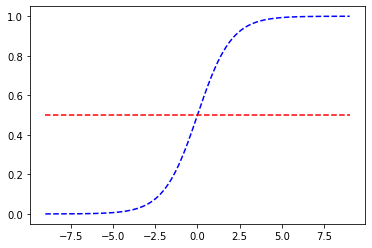

In [60]:
def graph_ineff(funct, x_range, cl='r--', show=False):
    y_range=[]                                                                                   
    for x in x_range:
        y_range.append(funct(x))
    plt.plot(x_range,y_range,cl)
    if show: plt.show()

xr=np.linspace(-9,9,1000)
graph_ineff(lambda z: 1/(1+np.exp(-z)),xr,cl='b--')
graph_ineff(lambda z: 1/2,xr)

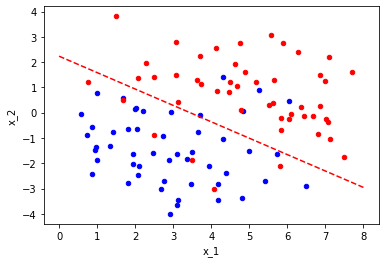

In [64]:
ax = plt.axes()

data_1.plot.scatter(x=0, y=1, ax=ax, color='blue')
data_2.plot.scatter(x=0, y=1, ax=ax, color='red')
plt.xlabel('x_1')
plt.ylabel('x_2')
theta = thetas[-1]
theta=thetas[-1]
graph_ineff(lambda x1: (theta[0] + (theta[1] * x1)) / (-theta[2]), np.linspace(0, 8, 1000))
plt.show()
